In [2]:
# Configure plotting functions
%matplotlib inline

In [15]:
# Configure libraries
import quandl
import pandas as pd
from fbprophet import Prophet

# Configure Quandl access
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

Importing plotly failed. Interactive plots will not work.


In [11]:
# Get Data
data = quandl.get("ZILLOW/N128_IMP") # Chelsea, NYC, real estate inventory

In [12]:
# Examine data
data.tail()

,Value
Date,
2018-05-31,310.0
2018-06-30,314.0
2018-07-31,297.0
2018-08-31,261.0
2018-09-30,290.0


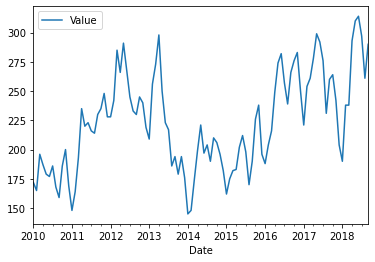

In [13]:
# Plot Data
data.plot()

In [23]:
# Transform data
prophet_data = data.reset_index()
prophet_data.columns = ["ds", "y"]
prophet_data.tail()

,ds,y
100,2018-05-31,310.0
101,2018-06-30,314.0
102,2018-07-31,297.0
103,2018-08-31,261.0
104,2018-09-30,290.0


In [24]:
# Fit model
m = Prophet()
m.fit(prophet_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/srv/conda/envs/notebook/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [26]:
# Generate predictions
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
130,2018-10-26,265.364604,230.042535,303.664370
131,2018-10-27,266.877657,230.986711,305.126420
132,2018-10-28,268.530721,234.194119,306.148501
133,2018-10-29,270.289701,232.522444,307.446149
134,2018-10-30,272.117393,238.127844,307.394419


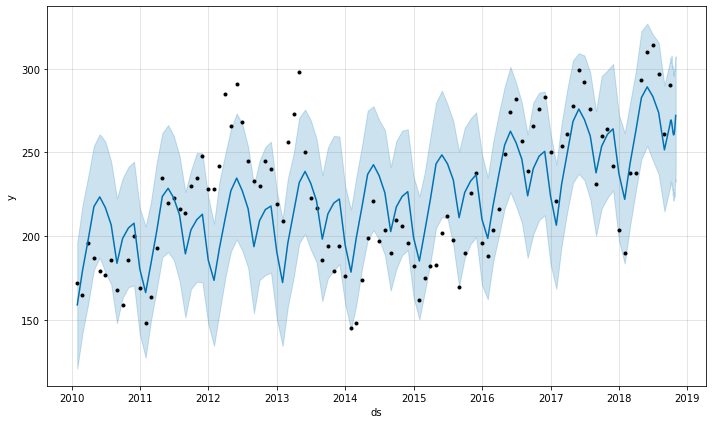

In [27]:
# Plot result
fig1 = m.plot(forecast)

In [ ]:
# Configure plotting functions
%matplotlib inline

# Configure libraries
import quandl
import pandas as pd
from fbprophet import Prophet

# Configure Quandl access
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

# Get Data
data = quandl.get("ZILLOW/N128_IMP") # Chelsea, NYC, real estate inventory

# Examine data
data.tail()

# Plot Data
data.plot()

# Transform data
prophet_data = data.reset_index()
prophet_data.columns = ["ds", "y"]
prophet_data.tail()

# Fit model
m = Prophet()
m.fit(prophet_data)

# Generate predictions
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plot result
fig1 = m.plot(forecast)